# Beberapa Contoh Penerapan Algoritma Genetika

1. Menggunakan bahasa pemrograman python
2. Menggunakan library **PyGAD**

**PyGAD**: Python library untuk algoritma genetika [https://pygad.readthedocs.io/en/latest/](https://pygad.readthedocs.io/en/latest/)

![pygad_page](img/img1.png "Halaman Awal Website PyGad")

- Cara install library **PyGAD**:

`pip install pygad`

## Bagaimana cara menggunakan **PyGAD**?

1. Persiapkan parameter `fitness_func`
2. Persiapkan parameter lainnya
3. Membuat *instance* dari `pygad.GA` *class*
5. Jalankan GA
6. Plot hasilnya
7. Tampilkan solusi terbaik

## Contoh 1 - Fungsi Minimum

1. Contoh penggunaan PyGAD dalam optimalisasi.
2. Mengoptimalkan persamaan

$$ f(x_1, x_2) = 3x_1^2 - 2x_1x_2 + 3x_2^2 - x_1 - x_2 - 3 $$

3. Berapa nilai $x_1$ dan $x_2$ sehingga $y$ atau $f(x_1, x_2)$ paling minimum?
4. Kita coba tampilkan `loss surface`-nya

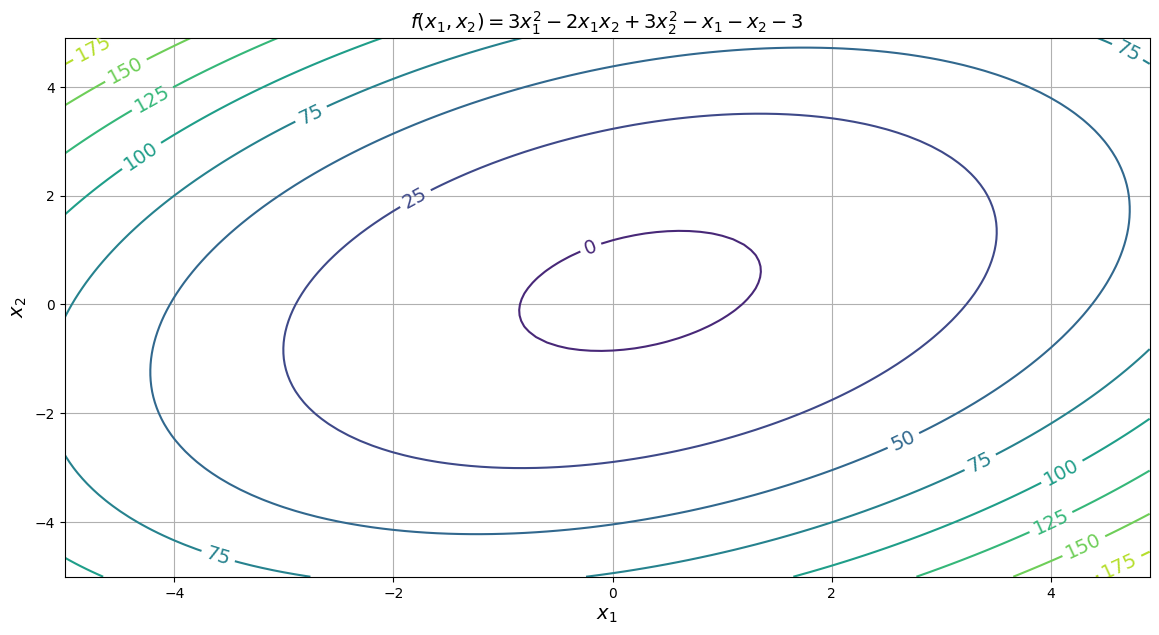

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def pers1(X,Y):
    return 3*X**2 - 2*X*Y + 3*Y**2 - X - Y - 3

x = np.vstack((np.array([np.arange(-5,5,0.1)]),
               np.array([np.arange(-5,5,0.1)])))

X,Y = np.meshgrid(x[0], x[1])
Z = pers1(X,Y)
fig, ax = plt.subplots(figsize=(14, 7))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=14)
ax.set_title('$ f(x_1, x_2) = 3x_1^2 - 2x_1x_2 + 3x_2^2 - x_1 - x_2 - 3$', fontsize=14)
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.grid()

### Persiapkan parameter `fitness_func`

- Persiapkan parameter `fitness_func`
- Gunakan persamaan $$ f(x_1, x_2) = 3x_1^2 - 2x_1x_2 + 3x_2^2 - x_1 - x_2 - 3$$
- Berapa nilai $x_1$ dan $x_2$ sehingga $y$ atau $f(x_1, x_2)$ paling minimum?
- **PyGad** akan mencari nilai fitness tertinggi.
- Karena permasalahan kita berupa mencari nilai minimum, maka luaran fitness function perlu dikali dengan -1

In [2]:
def pers1(X,Y):
    return 3*X**2 - 2*X*Y + 3*Y**2 - X - Y - 3

def calculate_fitness(ga_instance, solution, solution_idx):
    output = pers1(solution[0],solution[1])
    fitness = -output # perlu dikalikan dengan -1

    return fitness

### Persiapkan parameter lainnya

- `num_genes 2` karena variabel yang dicari ada 2 yaitu $x_1$ dan $x_2$
- Parameter lainnya dapat dilihat di website **PyGad**: [https://pygad.readthedocs.io/en/latest/pygad.html#pygad-ga-class](https://pygad.readthedocs.io/en/latest/pygad.html#pygad-ga-class)

In [3]:
num_genes = 2
num_generations = 20
num_parents_mating = 3
sol_per_pop = 10
parent_selection_type="sss"
keep_parents=1
crossover_type="uniform"
mutation_type="random"
mutation_probability = .5

def on_generation(ga):
    print("\nGenerasi ke:", ga.generations_completed)
    print(ga.population)

### Membuat *instance* dari `pygad.GA` *class*

- Argumen lainnya dapat dilihat di website **PyGad**: [https://pygad.readthedocs.io/en/latest/pygad.html#pygad-ga-class](https://pygad.readthedocs.io/en/latest/pygad.html#pygad-ga-class)

In [4]:
import pygad

ga_instance1 = pygad.GA(num_generations = num_generations,
                       num_parents_mating = num_parents_mating,
                       fitness_func = calculate_fitness,
                       sol_per_pop = sol_per_pop,
                       num_genes = num_genes,
                       parent_selection_type = parent_selection_type,
                       keep_parents = keep_parents,
                       crossover_type = crossover_type,
                       mutation_type = mutation_type,
                       mutation_probability = mutation_probability,
                       on_generation = on_generation
                       )

/home/fafa/miniconda3/envs/py311/lib/python3.11/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


### Jalankan GA

- Jalankan GA dengan menggunakan method `run` dari instance yang sudah dibuat `ga_instance1`

In [5]:
ga_instance1.run()


Generasi ke: 1
[[ 0.80892009  1.66458062]
 [ 0.14996834  1.66458062]
 [-0.63479799  0.19805145]
 [ 0.80892009  0.85992485]
 [ 1.85595153  0.90865709]
 [-0.74742125 -0.28438858]
 [-1.56606206  1.70471666]
 [ 0.80892009  1.72843713]
 [ 1.85595153  0.19805145]
 [ 0.80892009  0.19805145]]

Generasi ke: 2
[[ 0.80892009  0.19805145]
 [ 0.09076854  0.19805145]
 [-0.63479799  1.17182533]
 [-0.63479799 -0.79090431]
 [ 0.80892009  0.85992485]
 [-0.63479799  0.85992485]
 [ 0.04065821  0.9242583 ]
 [ 0.80892009 -0.67483185]
 [ 1.26813245  0.4731664 ]
 [ 0.80892009 -0.56276006]]

Generasi ke: 3
[[ 0.09076854  0.19805145]
 [ 0.43763206  0.19805145]
 [ 0.80892009  0.19805145]
 [ 0.60187082  0.31752118]
 [-0.58678888  1.05744676]
 [ 0.80892009  0.19805145]
 [ 0.80892009  0.85992485]
 [ 0.16945303  0.19805145]
 [ 0.80892009  0.85992485]
 [ 0.26479042  0.71414043]]

Generasi ke: 4
[[ 0.16945303  0.19805145]
 [ 0.49680646  0.19805145]
 [ 1.01566313  0.19805145]
 [ 0.03938868 -0.23226756]
 [ 0.09612659  

### Plot hasilnya

- Menampilkan plot hasil dengan menggunakan method `plot_fitness`

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


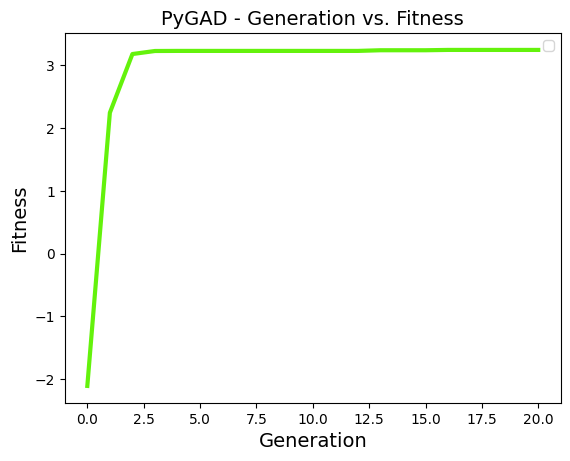

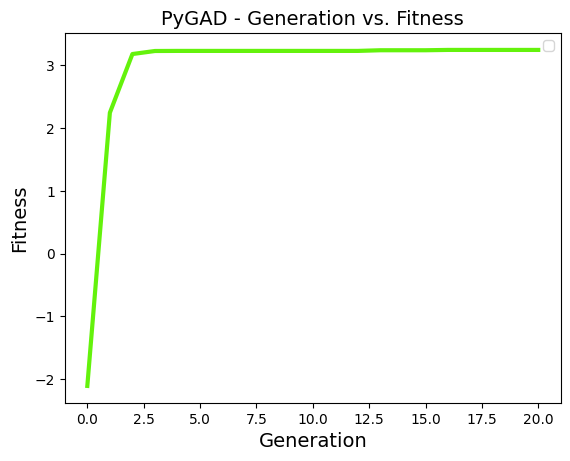

In [6]:
ga_instance1.plot_fitness()

### Tampilkan solusi terbaik

- Menampilkan solusi terbaik dengan menggunakan method `best_solution`

In [7]:
solution, solution_fitness, solution_idx = ga_instance1.best_solution()
print(f"Parameters dari solusi terbaik [x1, x2] = {solution}")
print(f"Nilai fitness dari solusi terbaik = {-solution_fitness}")
print(f'Solusi terbaik berada di indeks ke-{solution_idx}')

Parameters dari solusi terbaik [x1, x2] = [0.22860054 0.22603043]
Nilai fitness dari solusi terbaik = -3.247928440301812
Solusi terbaik berada di indeks ke-0


## Contoh 2 - Travelling Salesman Problem

1. Mencari rute terbaik
2. Mengunjungi semua kedai kopi janji jiwa
3. Mulai dari ITK, kembali ke ITK

![](img/img2.png)

### Persiapkan parameter `fitness_func`

- Membuat tabel berisikan semua jarak antar titik
- Jarak dari ITK ke Janji Jiwa Grand City

![](img/img3.png)

- Jarak dari ITK ke Janji Jiwa Bumi Nirwana

![](img/img4.png)

- Jarak dari Janji Jiwa Grand City ke Janji Jiwa Bumi Nirwana

![](img/img5.png)

- Sehingga didapatkan keseluruhan jarak antara semua titik
- Simpan dalam format file **csv**

![](img/img6.png)

- Bagaimana `fitness_func`-nya?
- Optimalkan rute terpendek
- Contoh:
    - ITK $\rightarrow$ 12.1 km $\rightarrow$ Indrakila $\rightarrow$ 3.3 km $\rightarrow$ Grand City $\rightarrow$ 2.6 km $\rightarrow$ MT. Haryono $\rightarrow$ 1.8 km $\rightarrow$ Ruhui Rahayu $\rightarrow$ 7.9 km $\rightarrow$ Ahmad Yani $\rightarrow$ 20.5 km $\rightarrow$ ITK
    - TOTAL = 48.2 KM

In [8]:
import pandas as pd

data = pd.read_csv('data_janji_jiwa.csv')
data

,JARAK (KM),ITK,INDRAKILA,GRAND CITY,MT. HARYONO,RUHUI RAHAYU,AHMAD YANI
0,ITK,0.0,12.1,12.4,14.7,16.4,20.5
1,INDRAKILA,12.1,0.0,3.3,3.7,5.4,6.2
2,GRAND CITY,12.4,3.3,0.0,2.6,4.3,9.0
3,MT. HARYONO,14.7,3.7,2.6,0.0,1.7,6.8
4,RUHUI RAHAYU,16.4,5.4,4.3,1.8,0.0,7.9
5,AHMAD YANI,20.5,6.2,9.0,6.8,7.9,0.0


- Bagaimana cara mengambil nilai berdasarkan indeks-indeksnya

In [9]:
data.iloc[0]

JARAK (KM)       ITK
ITK              0.0
INDRAKILA       12.1
GRAND CITY      12.4
MT. HARYONO     14.7
RUHUI RAHAYU    16.4
AHMAD YANI      20.5
Name: 0, dtype: object

- Dari ITK ke ITK
- Indeksnya tidak sama

In [10]:
data.iloc[0,1]

0.0

- Sehingga dari ITK ke Indrakila perlu ditambahkan nilai 1

In [11]:
data.iloc[0,1+1]

12.1

In [12]:
data.iloc[1]

JARAK (KM)      INDRAKILA
ITK                  12.1
INDRAKILA             0.0
GRAND CITY            3.3
MT. HARYONO           3.7
RUHUI RAHAYU          5.4
AHMAD YANI            6.2
Name: 1, dtype: object

- Sehingga _fitness function_ adalah:

In [13]:
def cal_fitness(ga_instance, solution, solution_idx):
    distance = 0

    for i in range(len(solution)):
        if i == 0:
            distance += data.iloc[0, solution[i]+1]
        elif i == len(solution)-1:
            distance += data.iloc[solution[i-1], solution[i]+1] + data.iloc[solution[i], 1]
        else:
            distance += data.iloc[solution[i-1], solution[i]+1]

    return -distance

### Persiapkan parameter lainnya

- Parameter berbeda dengan Contoh 1
- Jumlah gen `num_genes` adalah 5. Mewakili rute. Contoh:

    (Gen 1) | (Gen 2) | (Gen 3) | (Gen 4) | (Gen 5)
    --- | --- | --- | --- | --- 
    Indrakila $\rightarrow$ | Grand City $\rightarrow$ | MT. Haryono $\rightarrow$ | Ruhui Rahayu $\rightarrow$ | Ahmad Yani

- Parameter jenis gen (`gene_type`) yang digunakan adalah `int`
- Karena nilai pada gen mewakili rute yang dipilih maka nilai pada gen harus bersifat unik
- Sehingga perlu ditambahkan parameter `allow_duplicate_genes = False`

In [14]:
num_generations = 20
num_parents_mating = 2
sol_per_pop = 10
num_genes = 5
gene_type = int
gene_space = np.arange(1,len(data))
allow_duplicate_genes = False
mutation_type = 'random'
mutation_percent_genes = 50

def on_generation(ga):
    print("Generation", ga.generations_completed)
    print(ga.population)

### Membuat *instance* dari `pygad.GA` *class*

In [15]:
import pygad

ga_instance2 = pygad.GA(num_generations = num_generations,
                       num_parents_mating = num_parents_mating,
                       fitness_func = cal_fitness,
                       sol_per_pop = sol_per_pop,
                       num_genes = num_genes,
                       gene_type = gene_type,
                       gene_space = np.arange(1,len(data)),
                       allow_duplicate_genes = allow_duplicate_genes,
                       on_generation = on_generation,
                       mutation_type = mutation_type,
                       mutation_percent_genes = mutation_percent_genes
                       )

/home/fafa/miniconda3/envs/py311/lib/python3.11/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


### Jalankan GA

- Jalankan GA dengan menggunakan method `run`

In [16]:
ga_instance2.run()

Generation 1
[[1 5 4 3 2]
 [1 3 4 5 2]
 [2 1 5 4 3]
 [1 2 5 4 3]
 [2 1 4 3 5]
 [1 5 2 4 3]
 [3 1 4 2 5]
 [5 1 4 2 3]
 [5 4 2 3 1]
 [1 2 5 4 3]]
Generation 2
[[1 5 4 3 2]
 [3 5 1 4 2]
 [1 2 4 3 5]
 [1 2 4 3 5]
 [2 4 3 5 1]
 [1 3 2 4 5]
 [3 5 4 2 1]
 [1 3 2 4 5]
 [2 1 4 3 5]
 [4 5 1 2 3]]
Generation 3
[[1 5 4 3 2]
 [1 4 3 5 2]
 [4 2 1 5 3]
 [4 1 2 5 3]
 [5 1 4 3 2]
 [2 4 1 5 3]
 [3 4 2 1 5]
 [5 1 3 2 4]
 [2 5 3 4 1]
 [4 5 1 2 3]]
Generation 4
[[1 5 4 3 2]
 [1 5 4 2 3]
 [1 5 3 2 4]
 [1 5 4 3 2]
 [5 4 3 2 1]
 [1 3 2 4 5]
 [4 5 1 3 2]
 [1 4 5 3 2]
 [2 4 5 3 1]
 [2 5 3 1 4]]
Generation 5
[[1 5 4 3 2]
 [5 1 4 3 2]
 [1 5 4 3 2]
 [1 5 4 3 2]
 [5 1 4 3 2]
 [1 5 4 3 2]
 [2 5 4 3 1]
 [4 1 5 3 2]
 [1 5 3 4 2]
 [3 5 4 1 2]]
Generation 6
[[1 5 4 3 2]
 [1 5 4 3 2]
 [2 5 4 3 1]
 [1 4 5 3 2]
 [4 5 1 3 2]
 [1 5 4 3 2]
 [3 2 4 1 5]
 [2 5 4 1 3]
 [1 5 2 3 4]
 [1 2 4 3 5]]
Generation 7
[[1 5 4 3 2]
 [1 5 3 4 2]
 [1 5 4 3 2]
 [1 2 4 3 5]
 [2 5 4 1 3]
 [1 5 4 3 2]
 [1 5 4 2 3]
 [1 4 5 3 2]
 [2 5 4 3 1]
 [1 3 

### Plot hasilnya

- Tampilkan plot hasilnya dengan menggunakan method `plot_fitness`

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


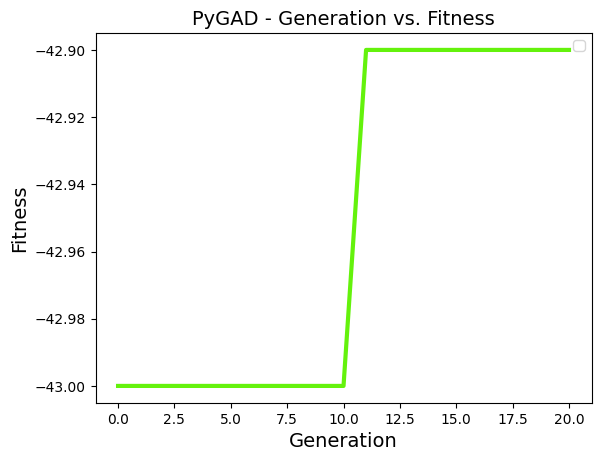

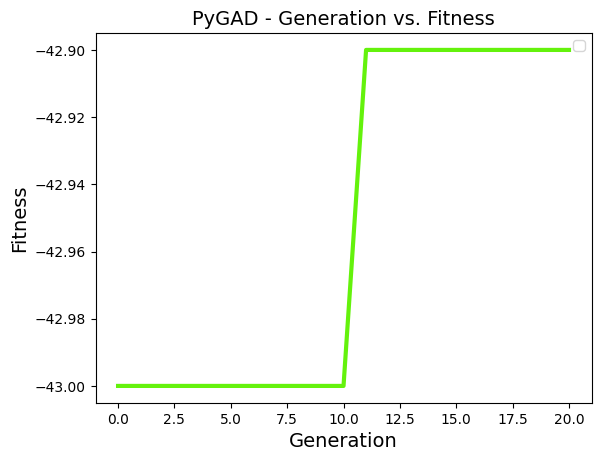

In [17]:
ga_instance2.plot_fitness()

### Tampilkan solusi terbaik

- Menampilkan solusi terbaik dengan menggunakan method `best_solution`

In [18]:
solution, solution_fitness, solution_idx = ga_instance2.best_solution()
print(f"Parameters dari solusi terbaik : {solution}")
print(f"Nilai fitness dari solusi terbaik = {-solution_fitness}")

Parameters dari solusi terbaik : [2 3 4 5 1]
Nilai fitness dari solusi terbaik = 42.900000000000006


In [19]:
rute_terbaik = data.iloc[0,0]
for i in range(len(solution)):
    rute_terbaik += ' -> ' + data.iloc[solution[i],0]

rute_terbaik += " -> " + data.iloc[0,0]

print("Rute ngopi terbaik adalah:\n'{}'\ndengan total jarak tempuh {:.2f} km".format(rute_terbaik,-solution_fitness))

Rute ngopi terbaik adalah:
'ITK -> GRAND CITY -> MT. HARYONO -> RUHUI RAHAYU -> AHMAD YANI -> INDRAKILA -> ITK'
dengan total jarak tempuh 42.90 km
